# Data Mining, Big Data and Visualization

Moldova's wine culture is rooted from the ancient ages. Currently producing around 2 million hectolitres of wine, Moldova is the [11th largest](https://www.statista.com/statistics/445651/leading-countries-wine-production-europe/) European wine-producing country. Many families have their own recipes and strands of grapes that have been passed down through the generations, so wine quality has a special place in our culture.

Wine is produced from fermenting grapes. The sugar in the grapes is fermented by the yeast, converting it to ethylic alcohol, carbon dioxide and heat. The wines from different wine regions usually taste different due to different sunlight, which causes differences in the sugar content, as well as the yeast that is used for fermenting.

In this project we will study the physical and chemical attributes of the white vinho verde wine samples, from the north of Portugal. Unfortunately there aren't any local samples available, so the Portuguese dataset will be used instead.

# Analysis of the dataset

The dataset provides samples of both white and red wines. We will ignore the red samples, working only with the white wines in the project. First we need to import the data from csv into a Pandas dataset. The Pandas dataset is really close to the datasets functions from scikit-learn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('./data/winequality-white.csv', delimiter=';')
print('White whine dataset shape: {}'.format(dataset.shape))

White whine dataset shape: (4898, 12)


We see that there are 4898 different wines, each described by 12 different parameters:

* [fixed acidity, volatile acidity, pH](https://winefolly.com/deep-dive/understanding-acidity-in-wine/). Acids are one of 4 fundamental traits in wine (the others are tannin, alcohol, and sweetness). Acidity gives a wine its tart and sour taste. Fundamentally speaking, all wines lie on the acidic side of the pH spectrum, and most range from 2.5 to about 4.5 pH (7 is neutral). There are several different types of acids found in wine, which will affect how acidic a wine tastes. The most prevalent acids found in wine are tartaric acid, malic acid, and citric acid.

* [citric acid](https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid) - Citric acid is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. It can be added to finished wines to increase acidity and give a “fresh” flavor. The disadvantage of adding citric acid is its microbial instability. Since bacteria use citric acid in their metabolism, it may increase the growth of unwanted microbes. Often to increase acidity of wine, winemakers will add tartaric acid instead.

* [residual sugar](https://winefolly.com/episode/sweetness-in-wine-wine-101-videos-ep-5/) - Residual Sugar (or RS) is from natural grape sugars leftover in a wine after the alcoholic fermentation finishes. It’s measured in grams per liter. Residual sugar levels vary in different types of wine. In fact, many grocery store wines labeled as “dry” contain about 10 g/L of residual sugar. Noticeably sweet wines start at around 35 grams per liter of residual sugar and then go up from there.

* chlorides - Salty is not a common wine descriptor. That it’s also not a positive one probably goes without saying. But the fact that wine-producing countries have (widely varying) legal maximums for sodium chloride in wine should tell you something. Salinity is a concern in dry locations when frequent irrigation increases soil salinity, which increases wine salinity. Soil composition often doesn’t translate in the way you’d expect into grape composition; salt is, unfortunately, an exception.

* [free sulfur dioxide, total sulfur dioxide, sulphates](https://winefolly.com/deep-dive/sulfites-in-wine/) - Sulfur is a natural component of the wine, especially if the grapes were grown on sulfate-rich soils. The process of using sulfites in wine has been around for as far back as ancient Rome. Back in Roman times, winemakers would burn candles made of sulfur in empty wine containers (called Amphora) to keep the wines from turning to vinegar. Sulfur started to be used in winemaking (instead of cleaning wine barrels) in the early 1900s to stop bacteria and other yeasts from growing. Wine ranges from about 5 mg/L (5 parts per million) to about 200 mg/L. The maximum legal limit in the United States is 350 mg/l. A well made dry red wine typically has about 50 mg/l sulfites.

* [density](https://winefolly.com/tips/what-is-wine-body-and-how-to-taste-it/) - it can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol. Here, it's expressed in gcm3. It correlates with the body of the wine. Body is the result of many factors – from wine variety, where it’s from, vintage, alcohol level and how it’s made. Body is a snapshot of the overall impression of a wine.

* [alcohol](https://winefolly.com/tips/alcohol-content-in-wine/) - Alcohol is formed as a result of yeast converting sugar during the fermentation process. The percentage of alcohol can vary from wine to wine. We interpret alcohol using many different taste receptors which is why it can taste bitter, sweet, spicy, and oily all at once. Your genetics actually plays a role in how bitter or sweet alcohol tastes. Regardless, we can all sense alcohol towards the backs of our mouths in our throats as a warming sensation

* quality - the quality measurement defining the overall desirability of the wine.


For every parameter we are going to perform an exploratory analysis. First we'll apply "describe" from Pandas to show the data on count, mean value, standard deviation, minimum and maximum values, quartiles.

In [2]:
pd.options.display.float_format = '{:.2f}'.format
dataset.describe(include='all')

fixed acidity  volatile acidity  citric acid  residual sugar  \
count        4898.00           4898.00      4898.00         4898.00   
mean            6.85              0.28         0.33            6.39   
std             0.84              0.10         0.12            5.07   
min             3.80              0.08         0.00            0.60   
25%             6.30              0.21         0.27            1.70   
50%             6.80              0.26         0.32            5.20   
75%             7.30              0.32         0.39            9.90   
max            14.20              1.10         1.66           65.80   

       chlorides  free sulfur dioxide  total sulfur dioxide  density      pH  \
count    4898.00              4898.00               4898.00  4898.00 4898.00   
mean        0.05                35.31                138.36     0.99    3.19   
std         0.02                17.01                 42.50     0.00    0.15   
min         0.01                 2.00                  9.00     0.99    2.72   
25%         0.04                23.00                108.00     0.99    3.09   
50%         0.04                34.00                134.00     0.99    3.18   
75%         0.05                46.00                167.00     1.00    3.28   
max         0.35               289.00                440.00     1.04    3.82   

       sulphates  alcohol  quality  
count    4898.00  4898.00  4898.00  
mean        0.49    10.51     5.88  
std         0.11     1.23     0.89  
min         0.22     8.00     3.00  
25%         0.41     9.50     5.00  
50%         0.47    10.40     6.00  
75%         0.55    11.40     6.00  
max         1.08    14.20     9.00

Though we are not wine experts, there are a couple of things we understand from the table above:

* The wines are overall on the acid side with average PH equal to 3.19. Standard deviation is 0.15, which means that the values are packed pretty tight. Outliers are to be expected in this column.

* Sulfur dioxide contents - Some wines have a very high Total sulfur dioxide contents. A few even aren't legal in USA, going above the 250 mg/l number. The mean content is 138.3 mg/l with a standard deviation of 42.5 mg/l. I think we will see outliers in this column as well with 440 mg/l content being too high compared to the mean.

* chlorides - the majority of wines are from grapes grown on soils wil low chlorides content, but we see a few with max value going to 0.35. Outliers are expected here as well

* alcohol content is normal for the wines, with an average of 10.51.

* residual sugar - here we also see some very few very sweet wines. When the average sugar content is 6.39 g/L for all the wines, the sweetest ones have 65.8 g/L. These will also be removed as outliers.

Next we study the data by checking out distinct values, if there are null values present, getting the values for skewness and kurtosis.

In [3]:
def explore_data(dataframe):
    columns = ['types', 'counts', 'uniques', 'uniques_count', 'distincts', 'nulls', 'skewness', 'kurtosis']
    nr_of_objects = dataframe.shape[0]
    types = dataframe.dtypes
    counts = dataframe.apply(lambda x: x.count())
    uniques = dataset.apply(lambda x: [x.unique()])
    uniques_count = pd.DataFrame([ len(x[0]) for x in uniques.values], index=uniques.index)
    nulls = dataframe.apply(lambda x: x.isnull().sum())
    distincts = dataframe.apply(lambda x: x.unique().shape[0])
    skewness = dataframe.skew()
    kurtosis = dataframe.kurt()
    
    exploration = pd.concat(
        [types, counts, uniques, uniques_count, distincts, nulls, skewness, kurtosis],
        axis=1)
    exploration.columns = columns
    return exploration
    
explore_data(dataset)

types  counts  \
fixed acidity         float64    4898   
volatile acidity      float64    4898   
citric acid           float64    4898   
residual sugar        float64    4898   
chlorides             float64    4898   
free sulfur dioxide   float64    4898   
total sulfur dioxide  float64    4898   
density               float64    4898   
pH                    float64    4898   
sulphates             float64    4898   
alcohol               float64    4898   
quality                 int64    4898   

                                                                uniques  \
fixed acidity         [[7.0, 6.3, 8.1, 7.2, 6.2, 8.6, 7.9, 6.6, 8.3,...   
volatile acidity      [[0.27, 0.3, 0.28, 0.23, 0.32, 0.22, 0.18, 0.1...   
citric acid           [[0.36, 0.34, 0.4, 0.32, 0.16, 0.43, 0.41, 0.3...   
residual sugar        [[20.7, 1.6, 6.9, 8.5, 7.0, 1.5, 1.45, 4.2, 1....   
chlorides             [[0.045, 0.049, 0.05, 0.057999999999999996, 0....   
free sulfur dioxide   [[45.0, 14.0, 30.0, 47.0, 28.0, 11.0, 17.0, 16...   
total sulfur dioxide  [[170.0, 132.0, 97.0, 186.0, 136.0, 129.0, 63....   
density               [[1.001, 0.9940000000000001, 0.9951, 0.9956, 0...   
pH                    [[3.0, 3.3, 3.26, 3.19, 3.18, 3.22, 2.99, 3.14...   
sulphates             [[0.45, 0.49, 0.44, 0.4, 0.47, 0.56, 0.53, 0.6...   
alcohol               [[8.8, 9.5, 10.1, 9.9, 9.6, 11.0, 12.0, 9.7, 1...   
quality                           [[6.0, 5.0, 7.0, 8.0, 4.0, 3.0, 9.0]]   

                      uniques_count  distincts  nulls  skewness  kurtosis  
fixed acidity                    68         68      0      0.65      2.17  
volatile acidity                125        125      0      1.58      5.09  
citric acid                      87         87      0      1.28      6.17  
residual sugar                  310        310      0      1.08      3.47  
chlorides                       160        160      0      5.02     37.56  
free sulfur dioxide             132        132      0      1.41     11.47  
total sulfur dioxide            251        251      0      0.39      0.57  
density                         890        890      0      0.98      9.79  
pH                              103        103      0      0.46      0.53  
sulphates                        79         79      0      0.98      1.59  
alcohol                         103        103      0      0.49     -0.70  
quality                           7          7      0      0.16      0.22

From the dataframe above we see that all the types are numeric inside the dataframe and no null values are found. All the numeric values are pretty diverse except the categorical data for wine quality which ranges from 3 to 9. 
The values of skewness and kurtosis are pretty interesting. We see that all the attributes have a positive skew, which means that the mass of the distribution is concentrated on the left of the figure. Greatest skew values are registered for chlorides, volatile acidity, free sulfur dioxide.
In the analysis of outliers we will use the value of kurtosis for understanding where the outliers are found. The attributes with greatest kurtosis are: chlorides, free sulfur dioxide, density, citric acid and volatile acidity. All these attributes are expected to hold outliers.

## Outlier analysis
Next we will check for outliers. We will consider outliers to be in the range greater than three standard deviations from the mean. The computations are performed by using the zscore function from scipy. We will also apply the zscore function to all colums except the quality.

In [4]:
from scipy.stats import zscore
test_columns = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol',
]

outlier_threshold = 3
wine_z = np.abs(zscore(dataset[test_columns]))
wine_z.shape

(4898, 11)

In [5]:
print(dataset.shape)
wine_outliers = dataset[(wine_z <= 3).all(axis=1)]
print(wine_outliers.shape)

(4898, 12)
(4502, 12)


We see that we have lost around 400 wines because of the outliers. This is the dataset we are going to use next.

## Correlation analysis

In [6]:
outliers = wine_outliers.corr(method='pearson')
outliers

fixed acidity  volatile acidity  citric acid  \
fixed acidity                  1.00             -0.04         0.29   
volatile acidity              -0.04              1.00        -0.15   
citric acid                    0.29             -0.15         1.00   
residual sugar                 0.08              0.06         0.09   
chlorides                      0.08              0.01         0.03   
free sulfur dioxide           -0.03             -0.08         0.12   
total sulfur dioxide           0.08              0.10         0.12   
density                        0.25             -0.01         0.14   
pH                            -0.40             -0.03        -0.14   
sulphates                     -0.02             -0.04         0.07   
alcohol                       -0.11              0.09        -0.06   
quality                       -0.09             -0.14         0.00   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity                   0.08       0.08                -0.03   
volatile acidity                0.06       0.01                -0.08   
citric acid                     0.09       0.03                 0.12   
residual sugar                  1.00       0.25                 0.36   
chlorides                       0.25       1.00                 0.12   
free sulfur dioxide             0.36       0.12                 1.00   
total sulfur dioxide            0.42       0.33                 0.62   
density                         0.84       0.46                 0.35   
pH                             -0.20      -0.04                -0.01   
sulphates                      -0.02       0.07                 0.08   
alcohol                        -0.48      -0.52                -0.26   
quality                        -0.11      -0.29                 0.03   

                      total sulfur dioxide  density    pH  sulphates  alcohol  \
fixed acidity                         0.08     0.25 -0.40      -0.02    -0.11   
volatile acidity                      0.10    -0.01 -0.03      -0.04     0.09   
citric acid                           0.12     0.14 -0.14       0.07    -0.06   
residual sugar                        0.42     0.84 -0.20      -0.02    -0.48   
chlorides                             0.33     0.46 -0.04       0.07    -0.52   
free sulfur dioxide                   0.62     0.35 -0.01       0.08    -0.26   
total sulfur dioxide                  1.00     0.55  0.01       0.15    -0.46   
density                               0.55     1.00 -0.09       0.10    -0.82   
pH                                    0.01    -0.09  1.00       0.16     0.10   
sulphates                             0.15     0.10  0.16       1.00    -0.05   
alcohol                              -0.46    -0.82  0.10      -0.05     1.00   
quality                              -0.17    -0.31  0.09       0.04     0.44   

                      quality  
fixed acidity           -0.09  
volatile acidity        -0.14  
citric acid              0.00  
residual sugar          -0.11  
chlorides               -0.29  
free sulfur dioxide      0.03  
total sulfur dioxide    -0.17  
density                 -0.31  
pH                       0.09  
sulphates                0.04  
alcohol                  0.44  
quality                  1.00

There is no strong correlation between any of the other columns to the quality. There are multiple cases of weak negative correlation - density(-31%), chlorides (-29%), total sulfur dioxide (-17%) and volatile acidity(-14%). On the other side we only see a positive correlation with alcohol content (44%).

The correlation can be better seen using a heatmap:

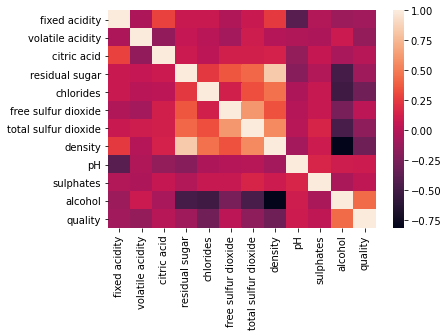

In [7]:
import seaborn as sns

sns.heatmap(outliers)
plt.show()

## Normalization

Normally as a measure for normalization we use the range of values in each column. We can see in the dataframe small values that range around the number 1:

- volatile acidity (0.28-1.10)
- citric acid (0.00-1.66)
- chlorides (0.01-0.35)
- density (0.99-1.04)
- sulphates (0.22-1.08)

And there are also values that range over a much greater amplitude:

- fixed acidity (3.80-14.20)
- residual sugar(0.60-65.80)
- free sulfur dioxide (2.00-289.00)
- total sulfur dioxide (9.00-440.00)

This means that we need to normalize the values in all the columns, except the target - quality. For that we will use the StandardScaler method from sklearn.

In [8]:
from sklearn.preprocessing import StandardScaler

wines_scaled = wine_outliers.copy()
wines_scaled[test_columns] = StandardScaler().fit_transform(wines_scaled[test_columns])
wines_scaled.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           0.20             -0.02         0.33            2.88       0.16   
1          -0.69              0.33         0.13           -0.97       0.50   
2           1.60              0.10         0.73            0.10       0.58   
3           0.46             -0.48        -0.06            0.42       1.27   
4           0.46             -0.48        -0.06            0.42       1.27   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 0.66                  0.79     2.42 -1.31      -0.33   
1                -1.35                 -0.13     0.01  0.78       0.04   
2                -0.31                 -0.98     0.39  0.50      -0.43   
3                 0.79                  1.17     0.56  0.01      -0.81   
4                 0.79                  1.17     0.56  0.01      -0.81   

   alcohol  quality  
0    -1.42        6  
1    -0.85        6  
2    -0.36        6  
3    -0.52        6  
4    -0.52        6

In [9]:
import time

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

not_normalized_X_train, not_normalized_X_test, not_normalized_y_train, not_normalized_y_test = train_test_split(
    wine_outliers[test_columns], wine_outliers['quality'], random_state=42)
normalized_X_train, normalized_X_test, normalized_y_train, normalized_y_test = train_test_split(
    wines_scaled[test_columns], wines_scaled['quality'], random_state=42)

non_normalized_start = time.time()
# MSE on non-normalized data
forest = RandomForestRegressor()
forest.fit(not_normalized_X_train, not_normalized_y_train)
yhat = forest.predict(not_normalized_X_test)
mse = mean_squared_error(yhat, not_normalized_y_test)
non_normalized_end = time.time()
print('Non normalized mean square error: {}\nNon normalized computation time: {}\n\n'.format(
    mse, non_normalized_end - non_normalized_start))

# MSE on normalized data
normalized_start = time.time()
forest = RandomForestRegressor()
forest.fit(normalized_X_train, normalized_y_train)
yhat = forest.predict(normalized_X_test)
mse = mean_squared_error(yhat, normalized_y_test)
normalized_end = time.time()
print('Normalized mean square error: {}\nNormalized computation time: {}'.format(
    mse, normalized_end - normalized_start))

Non normalized mean square error: 0.35614582593250443
Non normalized computation time: 1.9901609420776367


Normalized mean square error: 0.3565982238010657
Normalized computation time: 1.9996166229248047


We don't see any differences in computing speed using RandomForestRegressor between normalized and not-normalized data. Therefore there is no real need in scaling the wine quality dataset.

## Visualization of the dataset

Using 2-component PCA, the data was reduced to two variables, which are easy to plot.

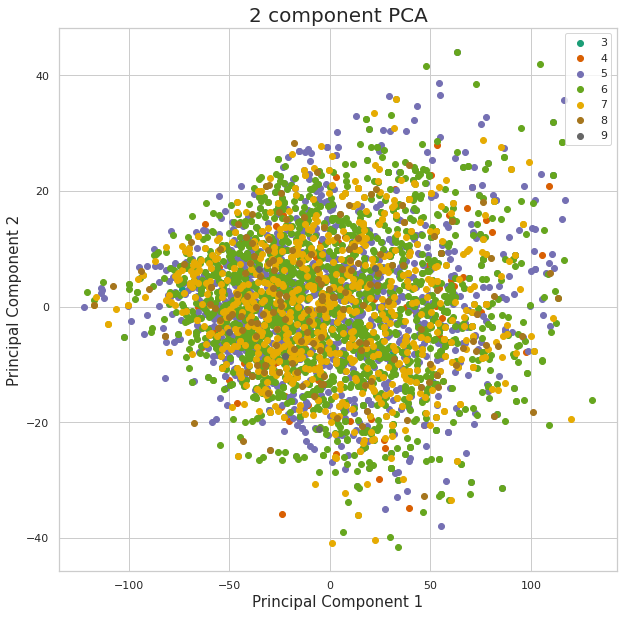

In [25]:
import random

from sklearn.decomposition import PCA
X = wine_outliers.copy()[test_columns]
pca = PCA(n_components=2)
transformed = pca.fit(X).transform(X)
principalDf = pd.DataFrame(
    data=transformed,
    columns=['pca1', 'pca2'])
finalDf = pd.concat([principalDf, wine_outliers[['quality']]], axis = 1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
targets = ['3', '4', '5', '6', '7', '8', '9']
cmap = plt.cm.get_cmap('Dark2', len(targets))
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

for index, target in enumerate(targets):
    rgb = (random.random(), random.random(), random.random())
    x = finalDf[finalDf['quality']==float(target)]
    ax.scatter(x['pca1'], x['pca2'], color=cmap(0.15*index))
    
ax.legend(targets)
plt.show()

It's visible that the wines are not properly clusterized. This will make using the methods learned very hard on the data.

As the quality is the target of the dataset, we are going to first visualize the distribution of wine quality counts per category.

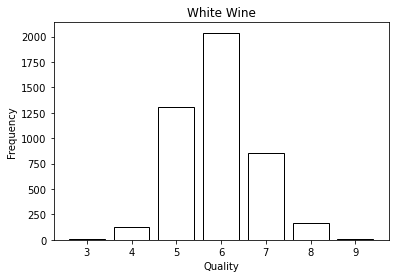

In [11]:
wine_qualities = wine_outliers.quality.value_counts(sort=True)
wine_qualities = (list(wine_qualities.index), list(wine_qualities.values))
graph = plt.bar(wine_qualities[0], wine_qualities[1], color='white', edgecolor='black', linewidth=1)
plt.title("White Wine")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.show()

From the distribution of wine quality, we can see that the shape of the figure roughly corresponds to normal, with a little bit of skewness to the left. The majority of wines are of quality 5,6 and 7. The lowest and highest qualities of the wines (quality 3,4,8 and 9) are only around 7.5% of the data total(3 - 0.4%, 4-3.3%, 8-3.6%, 9-0.1%). Therefore applying ML algorithms to this dataset will work well for finding out values of medium-quality wines while for very good or very bad wines the results are expected to be out of sync with reality.

### Density visualization

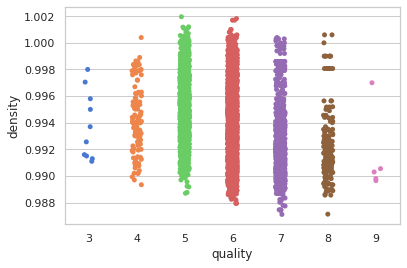

In [12]:

sns.set(style="whitegrid", palette="muted")

density_plot = sns.stripplot(data=wine_outliers, x="quality", y="density", jitter=True)

The plot shows clearly a small negative correlation between wine density and wine quality - the bigger the wine quality, the lower the density. Actually this is logical, as alcohol density is 789 kg/m^3 and we see the positive correlation between stronger wines and their quality. Therefore, due to the higher alcohol contents of the better quality wines, their density decreases with quality.

### Chlorides visualization

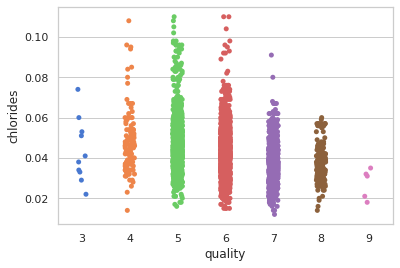

In [13]:
density_plot = sns.stripplot(data=wine_outliers, x="quality", y="chlorides", jitter=True)

Low chlorides contents are a clear sign of a good quality of the irrigation. The wines that were only irrigated using rain water are higher quality than the ones irrigated using underground waters, that rise the salt contents of the soil. We can see a clear negative correlation between chlorides and wine quality.

### Sulfurs visualization
Though we found a negative correlation only with total sulfur dioxide contents and almost no correlation with free sulfur dioxide, it's interesting how this will show off in our visualization.

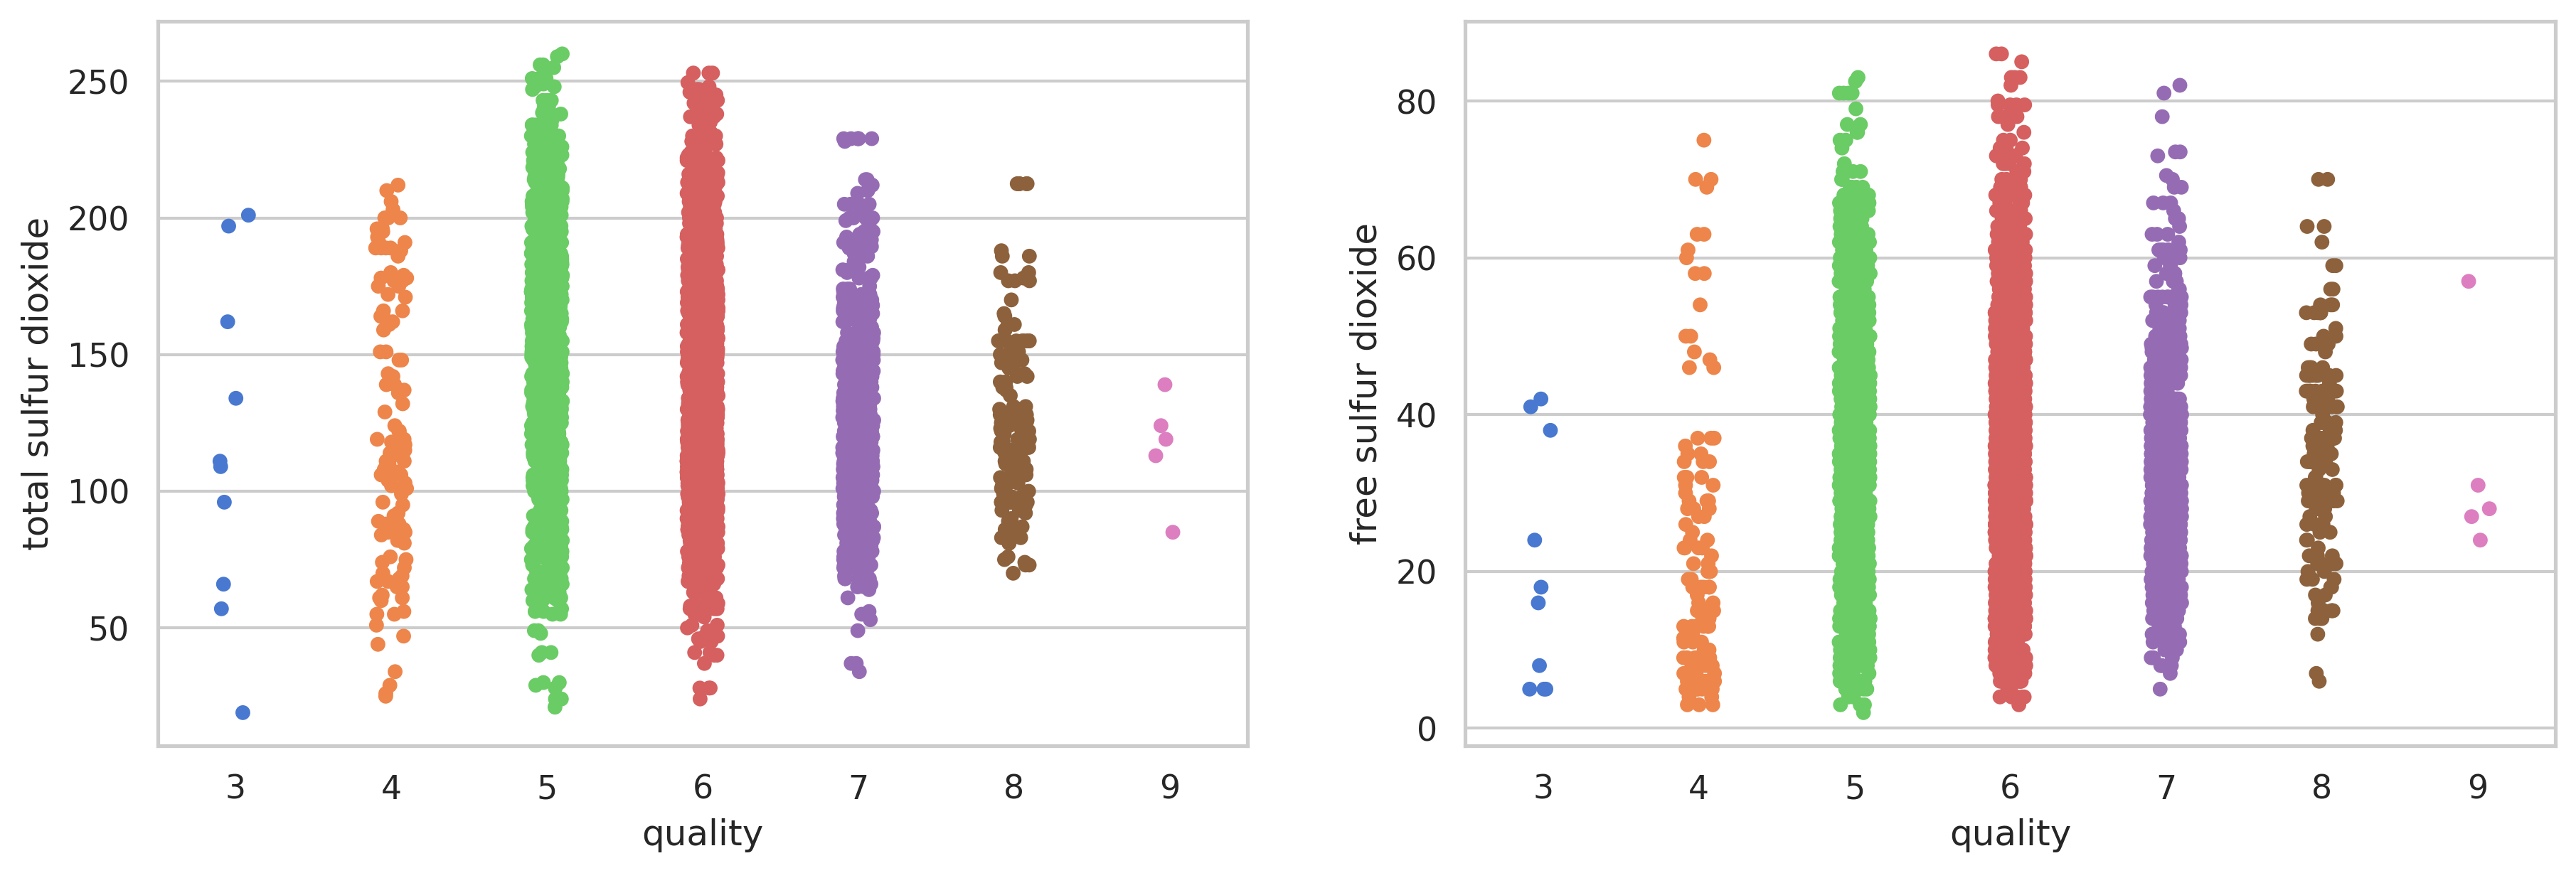

In [14]:
import seaborn as sns; sns.set(style="whitegrid", palette="muted")
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(14.5, 4.5)
fig.dpi = 300
sns.stripplot(data=wine_outliers, x="quality", y="total sulfur dioxide", jitter=True, ax=ax1)
sns.stripplot(data=wine_outliers, x="quality", y="free sulfur dioxide", jitter=True, ax=ax2)
plt.show()

We can see in the _total sulfur dioxide_ plot that there is a noticeable decrease of detected sulfur with increasing the wine quality. On the other side, the _free sulfur dioxide_ plot is more or less the same height for all categories with the exception of the very best and worst wine categories. We suppose that this is only due to a small representation of the extremes, if there were more data points of best and worst wines we should see more diverse sulfur dioxide contents.

It is to be noted that there are wines that naturally have high contents of sulfur and other wines that have added sulfur for stopping the microbial activity, which would keep the wine good for drinking for a longer time. There is no way for us to understand if the high sulfur content is natural or not based on its quality, but wine experts would surely be able to tell that.

### Volatile acidity visualization

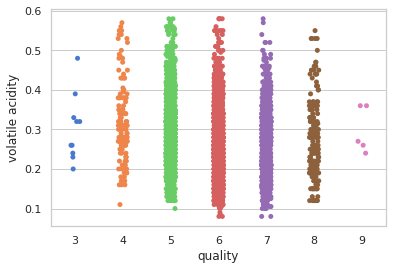

In [15]:
sns.set(style="whitegrid", palette="muted")

density_plot = sns.stripplot(data=wine_outliers, x="quality", y="volatile acidity", jitter=True)

The correlation between the quality and the volatile acidity is also not really noticeable. Wines over different acidity ranges have different qualities, so it's not really a good quality indicator.

### Alcohol visualization

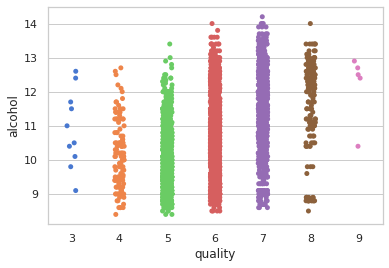

In [16]:
sns.set(style="whitegrid", palette="muted")

density_plot = sns.stripplot(data=wine_outliers, x="quality", y="alcohol", jitter=True)

Here the correlation between alcohol contents and quality is pretty noticeable. The higher the quality, the more alcohol contents on average is observed.

# Apply a machine-learning model
Depending on the dataset, apply a model in order to resolve the problem. Make a link with
the previous questions. If possible, apply several models and choose the best one.
 Use the Regression Line to predict values for some variables (you can choose any)


## Computing regression line for alcohol content

**Use the Regression Line to predict values for some variables (you can choose any variable as a target. Compute the error.**


Because the best correlation we see is tied to the alcohol contents, this it the first variable we are going to apply the LinearRegression model to:

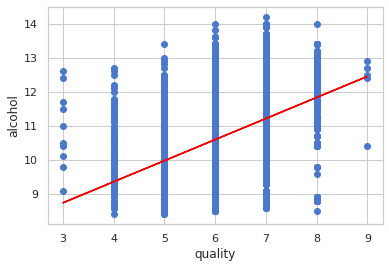

In [17]:
# Importing linear regression model from sklearn
from sklearn.linear_model import LinearRegression

dataset = wine_outliers.copy()
# Converting data frame to numpy arrays
X = dataset['quality'].values.reshape(-1,1)
y = dataset['alcohol'].values.reshape(-1,1)

# Fitting the linear regression model
linear = LinearRegression()
linear.fit(X, y)
regression_line = linear.predict(X)

# Plotting the results
plt.scatter(X, y)
plt.plot(X,regression_line, c='red')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

The regression line tries to show that lower quality wines will usually have lower alcohol contents. For example, the wines labeled with quality 3 have been projected to lower than 9% alcohol content, while the best wines of quality 9 are projected to have more than 12% alcohol content.

In [18]:
from sklearn.metrics import mean_squared_error

alcohol_regression_line_error = mean_squared_error(dataset['alcohol'], regression_line)
print('Alcohol regression line error: {}'.format(alcohol_regression_line_error))

Alcohol regression line error: 1.214317099307582


We see that the MSQ is near 1.2 for alcohol contents regression based on quality. For other values, given that the correlation is worse, we expect MSQ being bigger.

## Applying machine learning

**Use a machine learning method in order to predict the class of a new set of objects. You can use the methods as K-Nearest Neighbours (K-NN), Support Vector Machine (SVM), Decision trees, Neural Networks ... The obtained results should be validated using some external indexes as Prediction Error or others. The obtained results should be analysed in the report and provide a solution to ameliorate the results.**


First we import the necessary classes and functions

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

Next we'll select 70% of the dataset, from all the quality categories, for training the ML models

In [20]:
wines_dict = {x: dataset[dataset['quality']==x] for x in range(3,10)}
test_wines = {x: dataset.sample(n=round(0.7*wines_dict[x].shape[0])) for x in range(3,10)}


training_df = test_wines[3].copy()
for x in range(4,10):
    training_df = training_df.append(test_wines[4])
training_df.shape

(529, 12)

First use KNeighboursClassifier for n = 1, 3, 5

In [21]:
for neighbours in [1,3,5]:
    knn_classifier = KNeighborsClassifier(n_neighbors=1)
    knn_classifier.fit(training_df[test_columns], training_df['quality'])
    knn_prediction = knn_classifier.predict(dataset[test_columns])
    knn_score = accuracy_score(dataset['quality'], knn_prediction)
    knn_confusion_matrix = confusion_matrix(dataset['quality'], knn_prediction)
    print('KNeighboursClassifier for n = {}'.format(neighbours))
    print('Prediction Score: {}'.format(knn_score))
    print('Confusion Matrix: {}\n\n\n\n'.format(knn_confusion_matrix))

KNeighboursClassifier for n = 1
Prediction Score: 0.36472678809418035
Confusion Matrix: [[  0   0   2   5   2   1   0]
 [  0   8  33  66  12   5   0]
 [  0  38 430 606 178  57   0]
 [  0  56 507 982 363 130   0]
 [  0   9 166 375 209  96   0]
 [  0   0  29  78  41  13   0]
 [  0   0   2   3   0   0   0]]




KNeighboursClassifier for n = 3
Prediction Score: 0.36472678809418035
Confusion Matrix: [[  0   0   2   5   2   1   0]
 [  0   8  33  66  12   5   0]
 [  0  38 430 606 178  57   0]
 [  0  56 507 982 363 130   0]
 [  0   9 166 375 209  96   0]
 [  0   0  29  78  41  13   0]
 [  0   0   2   3   0   0   0]]




KNeighboursClassifier for n = 5
Prediction Score: 0.36472678809418035
Confusion Matrix: [[  0   0   2   5   2   1   0]
 [  0   8  33  66  12   5   0]
 [  0  38 430 606 178  57   0]
 [  0  56 507 982 363 130   0]
 [  0   9 166 375 209  96   0]
 [  0   0  29  78  41  13   0]
 [  0   0   2   3   0   0   0]]






KNeighboursClassifier isn't efficient in finding a good prediction for wine quality and increasing the number of neighbours doesn't improve the prediction score. It has actually lumped everything in the centre of the prediction matrix. Neither the lowest quality nor the highest quality wines weren't predicted at all. Therefore we think this method is wildly inaccurate.

In [22]:
svc_classifier = SVC()
svc_classifier.fit(training_df[test_columns], training_df['quality'])
svc_prediction = svc_classifier.predict(dataset[test_columns])
svc_score = accuracy_score(dataset['quality'], svc_prediction)
svc_confusion_matrix = confusion_matrix(dataset['quality'], svc_prediction)
print('SVC classifier')
print('Prediction Score: {}'.format(svc_score))
print('Confusion Matrix: {}\n\n\n\n'.format(svc_confusion_matrix))

SVC classifier
Prediction Score: 0.4526876943580631
Confusion Matrix: [[   0    0    0   10    0    0    0]
 [   0    0    0  124    0    0    0]
 [   0    0    0 1309    0    0    0]
 [   0    0    0 2038    0    0    0]
 [   0    0    0  855    0    0    0]
 [   0    0    0  161    0    0    0]
 [   0    0    0    5    0    0    0]]






Using SVC, we see that all the wines were predicted as corresponding to 6-level quality. It has a good prediction score, as the 6 quality stack is the highest, but for the other wines it proved to be wrong.

In [23]:
gaussian_classifier = GaussianNB()
gaussian_classifier.fit(training_df[test_columns], training_df['quality'])
gaussian_prediction = gaussian_classifier.predict(dataset[test_columns])
gaussian_score = accuracy_score(dataset['quality'], gaussian_prediction)
gaussian_confusion_matrix = confusion_matrix(dataset['quality'], gaussian_prediction)
print('Gaussian Naive classifier')
print('Prediction Score: {}'.format(gaussian_score))
print('Confusion Matrix: {}\n\n\n\n'.format(gaussian_confusion_matrix))

Gaussian Naive classifier
Prediction Score: 0.4320302087960906
Confusion Matrix: [[   0    0    5    3    0    2    0]
 [   0    8   43   66    4    3    0]
 [   0   64  356  824   45   20    0]
 [   0   37  243 1292  312  154    0]
 [   0    3   65  398  261  128    0]
 [   0    1   10   67   55   28    0]
 [   0    0    0    2    2    1    0]]






The Guassian Naive classifier didn't also perform well. The prediction score is of 43%, with wines quality being wildly inaccurately predicted by multiple degrees.

In [24]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(training_df[test_columns], training_df['quality'])
dt_prediction = dt_classifier.predict(dataset[test_columns])
dt_score = accuracy_score(dataset['quality'], dt_prediction)
dt_confusion_matrix = confusion_matrix(dataset['quality'], dt_prediction)
print('Decision Tree Classifier')
print('Prediction Score: {}'.format(dt_score))
print('Confusion Matrix: {}\n\n\n\n'.format(dt_confusion_matrix))

Decision Tree Classifier
Prediction Score: 0.40404264771212794
Confusion Matrix: [[   0    0    6    2    0    2    0]
 [   0    9   60   39   11    5    0]
 [   0   64  529  513  181   22    0]
 [   0   48  440 1054  347  149    0]
 [   0   13  100  407  192  143    0]
 [   0    2   20   80   24   35    0]
 [   0    0    1    1    1    2    0]]






Decision trees are also not efficient for predicting the correct wine quality. It also didn't guess correctly the lowest and highest wines quality, with the middle quality wines seemingly being randomly dispersed in the middle.

The resulting decision tree generated above is presented below:

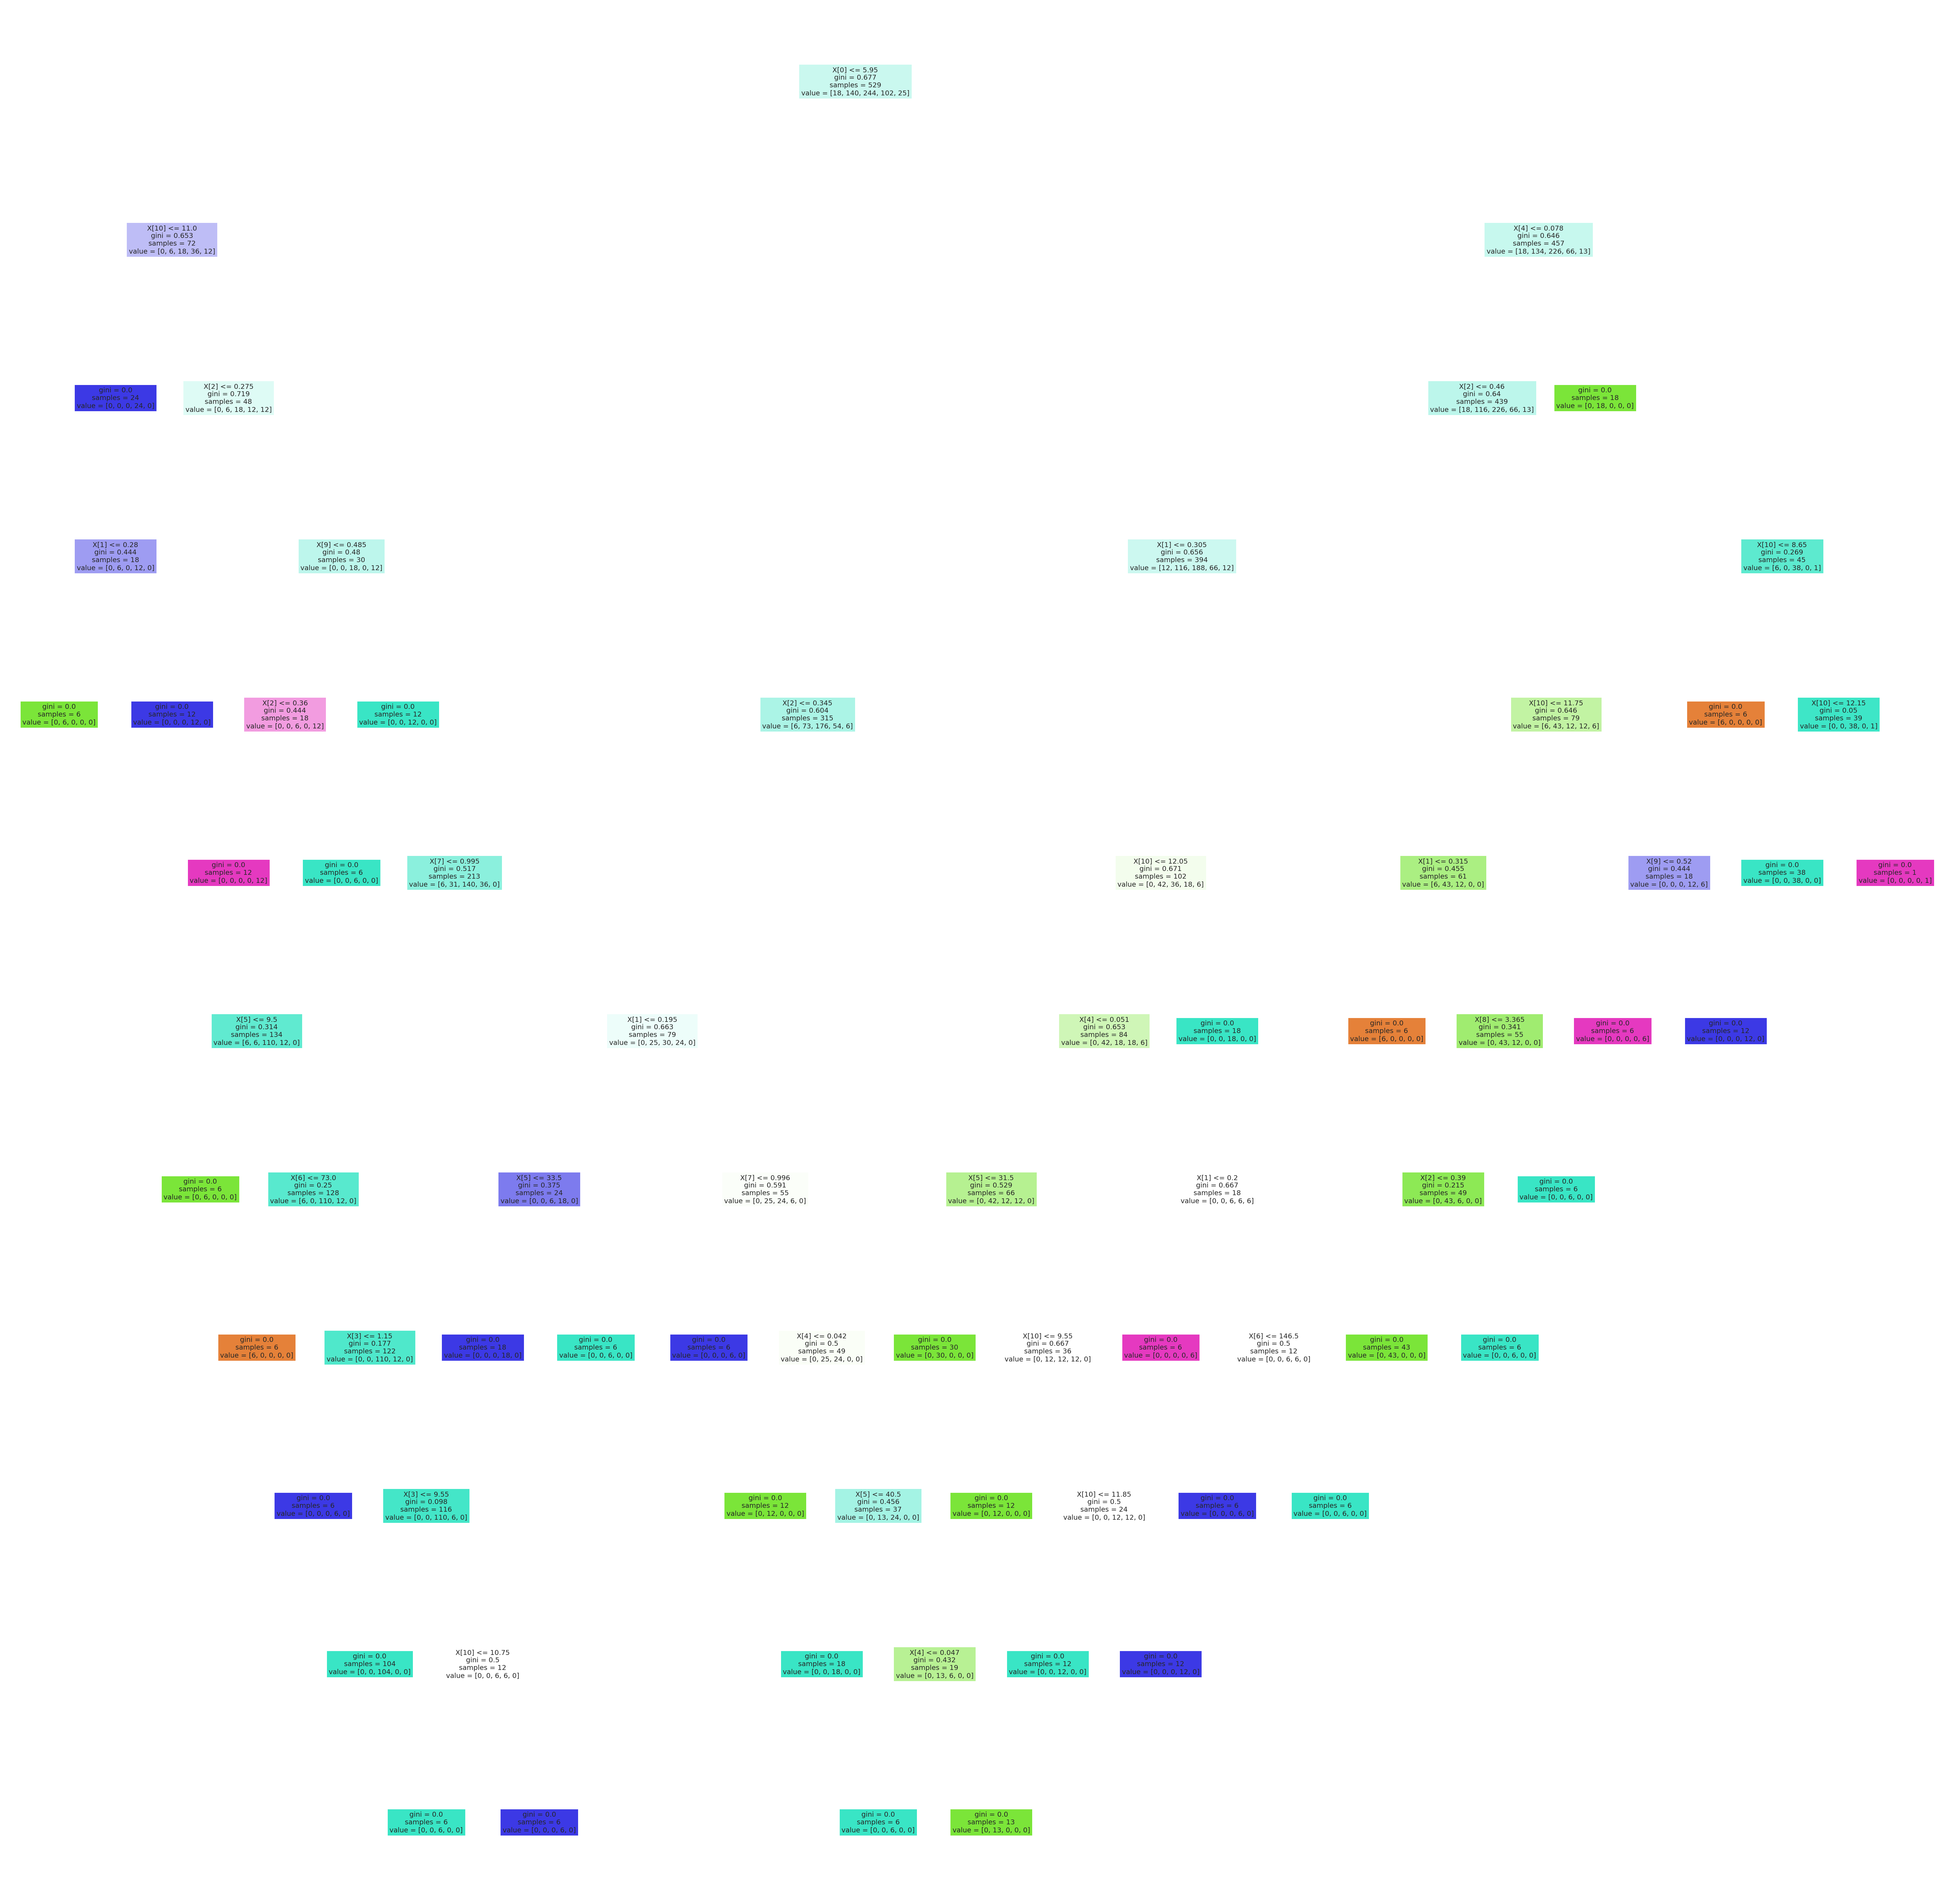

In [29]:
from sklearn import tree
plt.figure(figsize=(100,100))
tree.plot_tree(dt_classifier, filled=True)
plt.show()

## Conclusion

All the machine learning algorithms used above weren't able to predict with a high enough margin the quality of the wines. Of course they are much better than a random uniform distribution, but not sufficient for a good prediction. The best prediction we got is the SVC classifier with 45% having been correctly predicted.

By using big data techniques like exploratory data analysis, using prediction algorithms, we have understood that finding the correct technique for correctly predicting the wine quality based on the wine parameters is pretty complicated, and we didn't get to finding a proper way to do that based on the data and algorithms that were used. 

Though some of the used techniques can be implemented on a large scale inside wine producing factories, for timely identification of wine quality, we surely don't recommend going for a higher alcohol content in the wines to get higher quality because having a good wine quality depends on many different criterias, which combined together will get the correct body during a degustation. The sweetened wines like our Pastoral ( a variation sweet Cahors wines ) are to be found over all the quality ranges. 

The other attribute we have noticed that positively impacts the wine quality is whether the grapes were irrigated using rain water or underground water. Using underground water negatively impacts the quality of the grapes and the overall quality of the wines.


# Bibliography

1. P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.
2. https://winefolly.com/ for better understanding the wines characteristics
3. ATBD and DM class notes